# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

# Data manipuating

In [2]:
acc_name = 'accuracy_table.csv'
conf_name = 'confidence_index.csv'

In [3]:
acc_df = pd.read_csv(acc_name)
acc_df

,Model name,English,Czech,Ukrainian,Param count (mil),Mean accuracy,Model type,Efficienty
0,bert-base-multilingual-cased,0.714,0.632,0.562,178,0.636,MaskedLM,35.730337
1,xlm-roberta-large,0.599,0.573,0.554,560,0.575,MaskedLM,10.267857
2,xlm-roberta-base,0.610,0.570,0.536,278,0.572,MaskedLM,20.575540
3,mt5-small,0.517,0.461,0.475,300,0.484,text2text,16.133333
4,mt5-large,0.575,0.484,0.502,1230,0.520,text2text,4.227642
5,stablelm-3b-4e1t,0.848,0.713,0.632,2795,0.731,CausalLM,2.615385
6,stablelm-zephyr-3b,0.743,0.571,0.521,2795,0.612,CausalLM,2.189624
7,RedPajama-INCITE-Base-3B-v1,0.822,0.684,0.605,2776,0.704,CausalLM,2.536023


In [4]:
acc_df['Mean accuracy'] = acc_df[['English', 'Czech', 'Ukrainian']].mean(axis=1).round(3)
acc_df['Model type'] = ['MaskedLM', 'MaskedLM', 'MaskedLM', 'text2text', 'text2text','CausalLM', 'CausalLM', 'CausalLM']
acc_df['Efficienty'] = acc_df['Mean accuracy']/acc_df['Param count (mil)']*10000
acc_df

,Model name,English,Czech,Ukrainian,Param count (mil),Mean accuracy,Model type,Efficienty
0,bert-base-multilingual-cased,0.714,0.632,0.562,178,0.636,MaskedLM,35.730337
1,xlm-roberta-large,0.599,0.573,0.554,560,0.575,MaskedLM,10.267857
2,xlm-roberta-base,0.610,0.570,0.536,278,0.572,MaskedLM,20.575540
3,mt5-small,0.517,0.461,0.475,300,0.484,text2text,16.133333
4,mt5-large,0.575,0.484,0.502,1230,0.520,text2text,4.227642
5,stablelm-3b-4e1t,0.848,0.713,0.632,2795,0.731,CausalLM,2.615385
6,stablelm-zephyr-3b,0.743,0.571,0.521,2795,0.612,CausalLM,2.189624
7,RedPajama-INCITE-Base-3B-v1,0.822,0.684,0.605,2776,0.704,CausalLM,2.536023


In [5]:
acc_df.to_csv(acc_name, index=False)

In [6]:
conf_df = pd.read_csv(conf_name)
conf_df

,Model name,English,Czech,Ukrainian,Model type,Params count (mil)
0,bert-base-multilingual-cased,15911,2509,1440,MaskedLM,178
1,xlm-roberta-large,35580,58335,52950,MaskedLM,560
2,xlm-roberta-base,20401,11904,25385,MaskedLM,278
3,mt5-small,1740,5140,3622,text2text,300
4,mt5-large,1997,10427,9913,text2text,1230
5,stablelm-3b-4e1t,56429,77932,6022,CausalLM,2795
6,stablelm-zephyr-3b,170648,36613,2108,CausalLM,2795
7,RedPajama-INCITE-Base-3B-v1,40689,53117,5287,CausalLM,2776


In [7]:
conf_df = conf_df.loc[:, ~conf_df.columns.str.contains('^Unnamed')]

In [8]:
conf_df['Model type'] = ['MaskedLM', 'MaskedLM', 'MaskedLM', 'text2text', 'text2text','CausalLM', 'CausalLM', 'CausalLM']
conf_df['Params count (mil)'] = acc_df['Param count (mil)'].copy()
conf_df

,Model name,English,Czech,Ukrainian,Model type,Params count (mil)
0,bert-base-multilingual-cased,15911,2509,1440,MaskedLM,178
1,xlm-roberta-large,35580,58335,52950,MaskedLM,560
2,xlm-roberta-base,20401,11904,25385,MaskedLM,278
3,mt5-small,1740,5140,3622,text2text,300
4,mt5-large,1997,10427,9913,text2text,1230
5,stablelm-3b-4e1t,56429,77932,6022,CausalLM,2795
6,stablelm-zephyr-3b,170648,36613,2108,CausalLM,2795
7,RedPajama-INCITE-Base-3B-v1,40689,53117,5287,CausalLM,2776


In [9]:
conf_df.to_csv(conf_name, index=False)

# Plots

## Full accuracy statistics

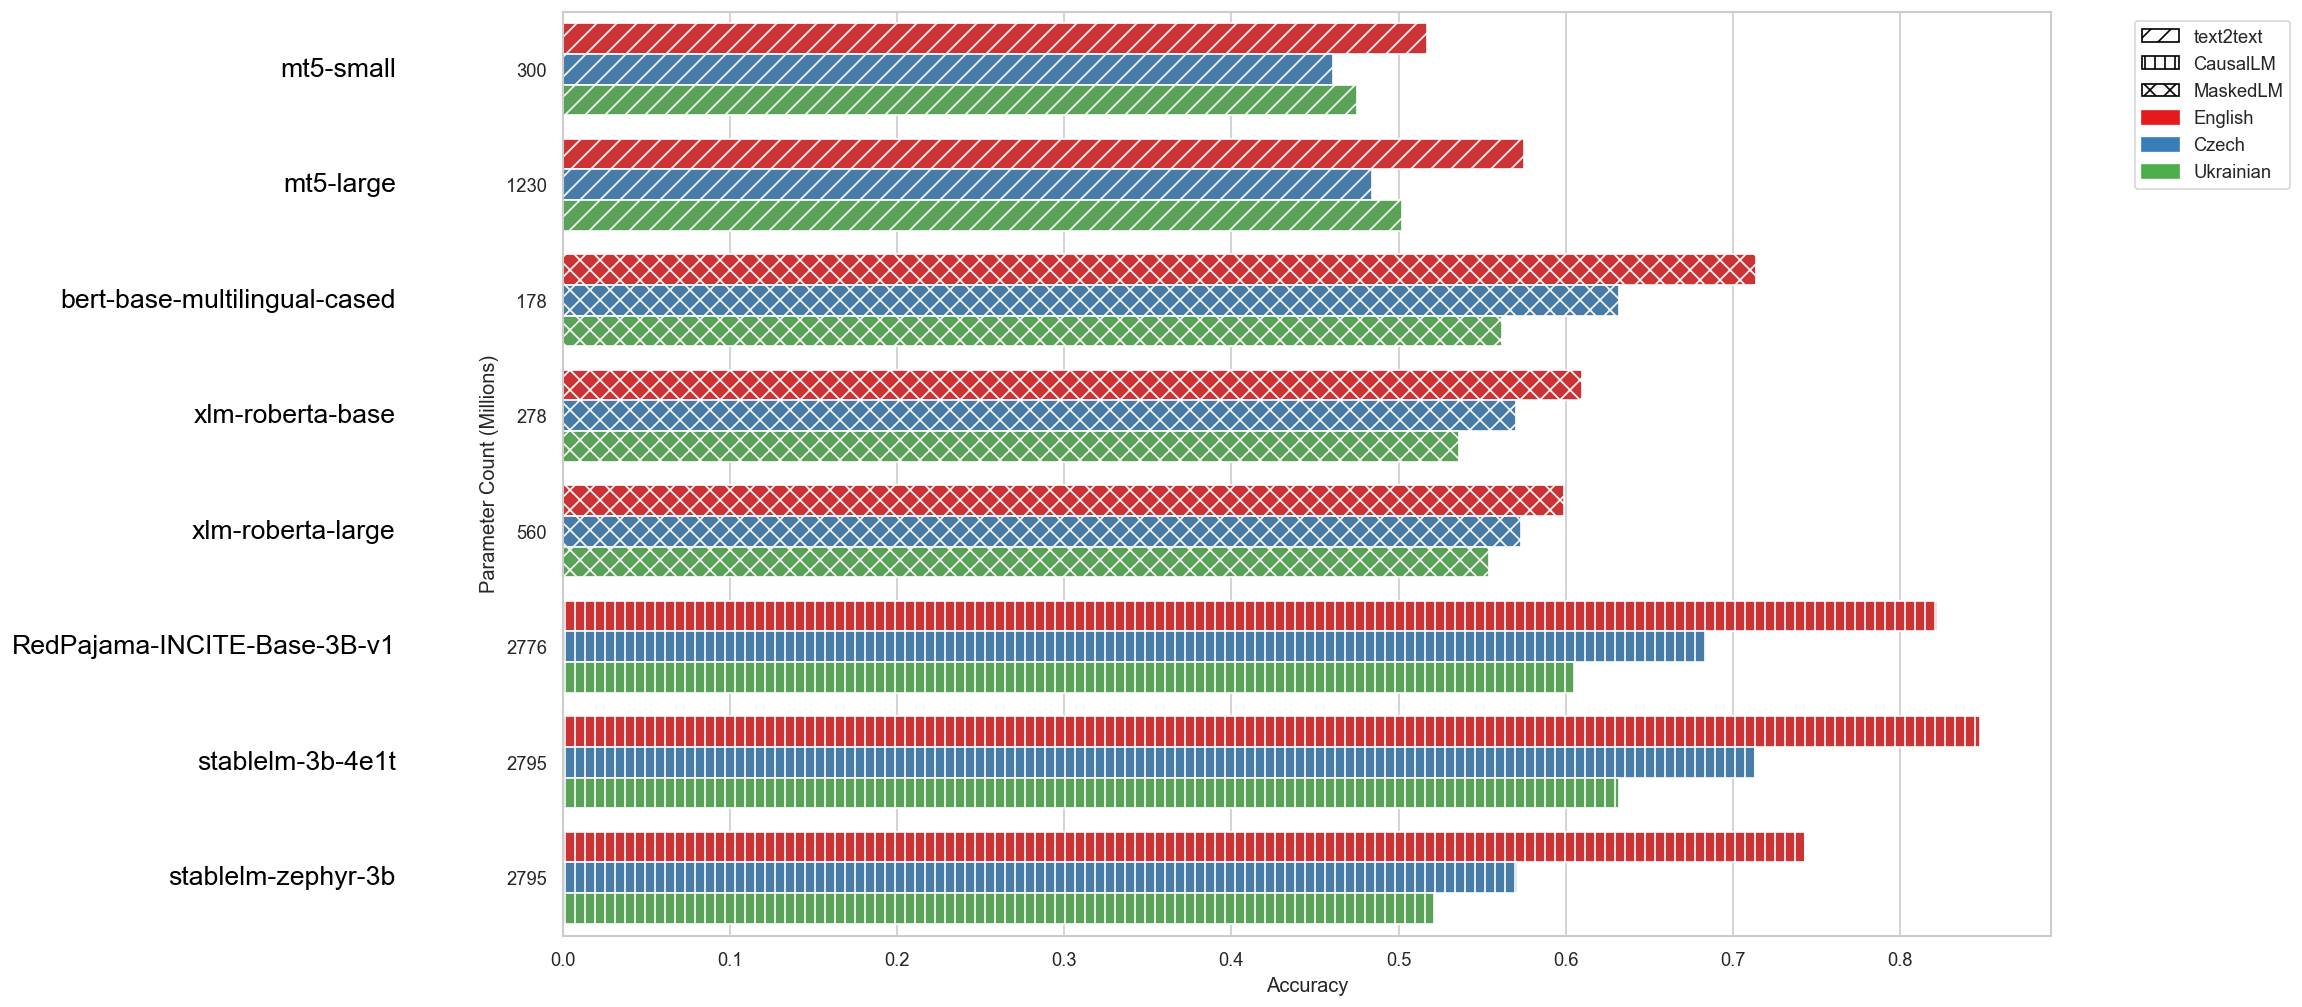

In [15]:
acc_df_sorted = acc_df.sort_values(by=['Model type', 'Param count (mil)'], ascending=[False, True])
acc_df_sorted.reset_index(drop=True, inplace=True)
acc_df_sorted['Index'] = range(len(acc_df_sorted))

# Reshape the dataframe to include language-specific mean accuracies
languages = ['English', 'Czech', 'Ukrainian']
acc_df_melted = acc_df_sorted.melt(
    id_vars=['Model name', 'Param count (mil)', 'Model type', 'Index'],
    value_vars=languages,
    var_name='Language',
    value_name='Accuracy'
)

# Define hatch patterns for different model types
hatch_patterns = {
    'text2text': '//',
    'CausalLM': '||',
    'MaskedLM': 'xx'
}

# Update plot settings for larger font size
plt.rcParams.update({'font.size': 16})

# Create the bar plot with language-specific and model-type-specific subcolumns with dodge
fig, ax = plt.subplots(figsize=(16, 10), dpi=120)
bar_plot = sns.barplot(
    data=acc_df_melted, 
    y='Index', 
    x='Accuracy', 
    hue='Language', 
    orient='h',
    palette="Set1",
    dodge=True
)

# Add hatch patterns manually
for bar, (_, row) in zip(ax.patches, acc_df_melted.iterrows()):
    hatch_pattern = hatch_patterns[row['Model type']]
    bar.set_hatch(hatch_pattern)

plt.yticks(acc_df_sorted['Index'], labels=acc_df_sorted['Param count (mil)'])
plt.ylabel('Parameter Count (Millions)')
plt.xlabel('Accuracy')

# Add model names as annotations inside the bars, aligned to the left edge of the plot
for index, row in acc_df_sorted.iterrows():
    ax.text(
        -0.1, 
        index, 
        row['Model name'], 
        color='Black', 
        ha='right', 
        va='center', 
        fontsize=16
    )

# Add custom legend for hatch patterns and languages
hatch_handles = [
    mpatches.Patch(
        facecolor='white', 
        edgecolor='black', 
        hatch=pattern, 
        label=model_type
    ) for model_type, pattern in hatch_patterns.items()
]
language_handles = [
    mpatches.Patch(
        color=sns.color_palette(
            "Set1")[i], 
        label=language
    ) for i, language in enumerate(acc_df_melted['Language'].unique())
]
plt.legend(
    handles=hatch_handles + language_handles, 
    loc='upper left', 
    bbox_to_anchor=(1.05, 1), 
    ncol=1
)

plt.show()

## Accuracy ~ Params count

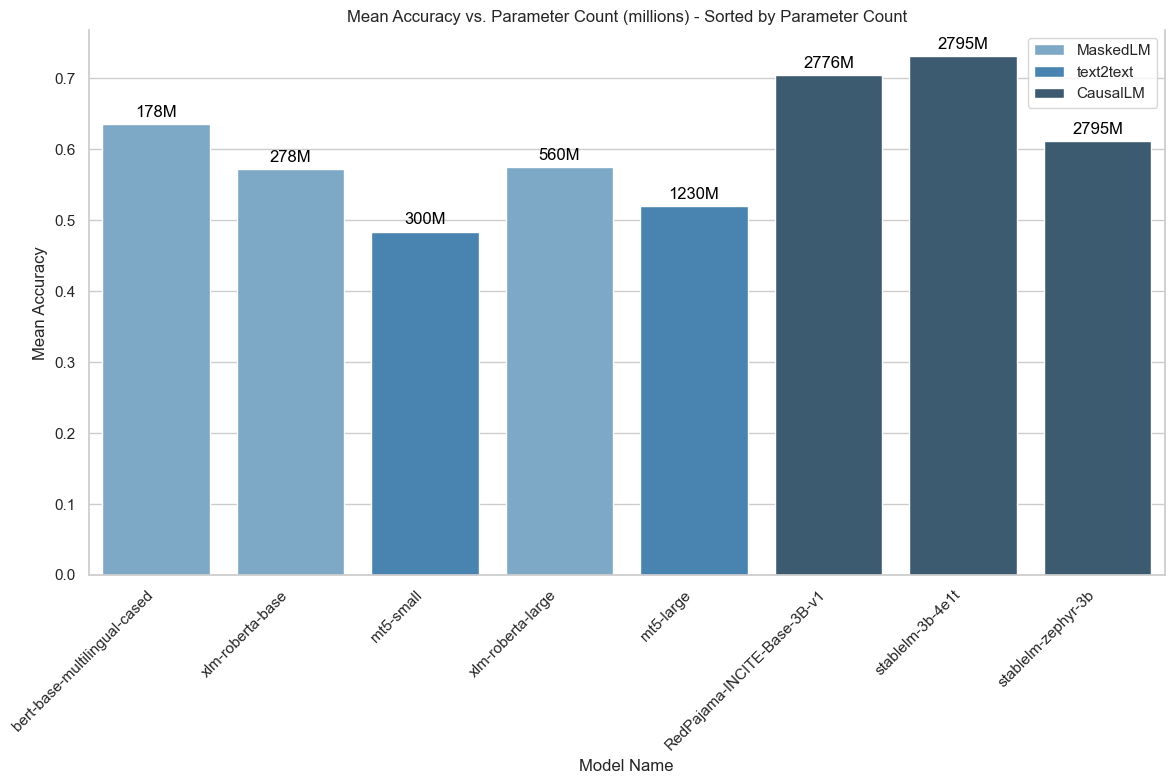

In [11]:
acc_df_sorted = acc_df.sort_values(by='Param count (mil)').reset_index(drop=True)

sns.set(style="whitegrid")

# Create the bar plot for 'Mean accuracy' vs 'Param count (mil)' with seaborn and remove the top spine
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Model name', 
    y='Mean accuracy', 
    data=acc_df_sorted, 
    hue = 'Model type',
    palette="Blues_d"
)
ax.set_title('Mean Accuracy vs. Parameter Count (millions) - Sorted by Parameter Count')
ax.set_xlabel('Model Name')
ax.set_ylabel('Mean Accuracy')
plt.xticks(rotation=45, ha="right")
plt.legend(loc='best')

# Adding parameter count as annotations
for i, row in acc_df_sorted.iterrows():
    ax.text(i, row['Mean accuracy'] + 0.01, f'{row["Param count (mil)"]}M', color='black', ha="center")

# Removing the top border
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('accuracy_params.png')
plt.show()

## Accuracy ~ model type

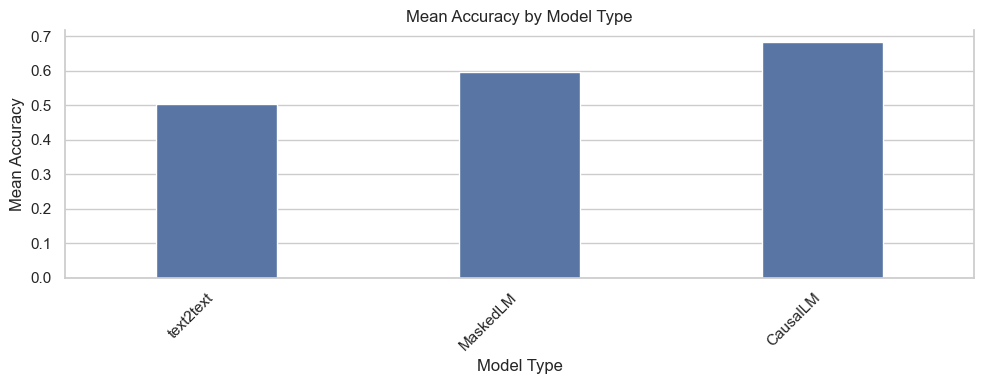

In [12]:
# Create a bar plot for 'Mean accuracy' vs 'Model type'
acc_df_grouped = acc_df.groupby('Model type')['Mean accuracy'].mean().sort_values()

plt.figure(figsize=(10, 4))
ax = sns.barplot(
    x=acc_df_grouped.index, 
    y=acc_df_grouped.values,
    width=0.4
)
ax.set_title('Mean Accuracy by Model Type')
ax.set_xlabel('Model Type')
ax.set_ylabel('Mean Accuracy')
plt.xticks(rotation=45, ha="right")

ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('accuracy_type.png')
plt.show()

## Accuracy ~ language

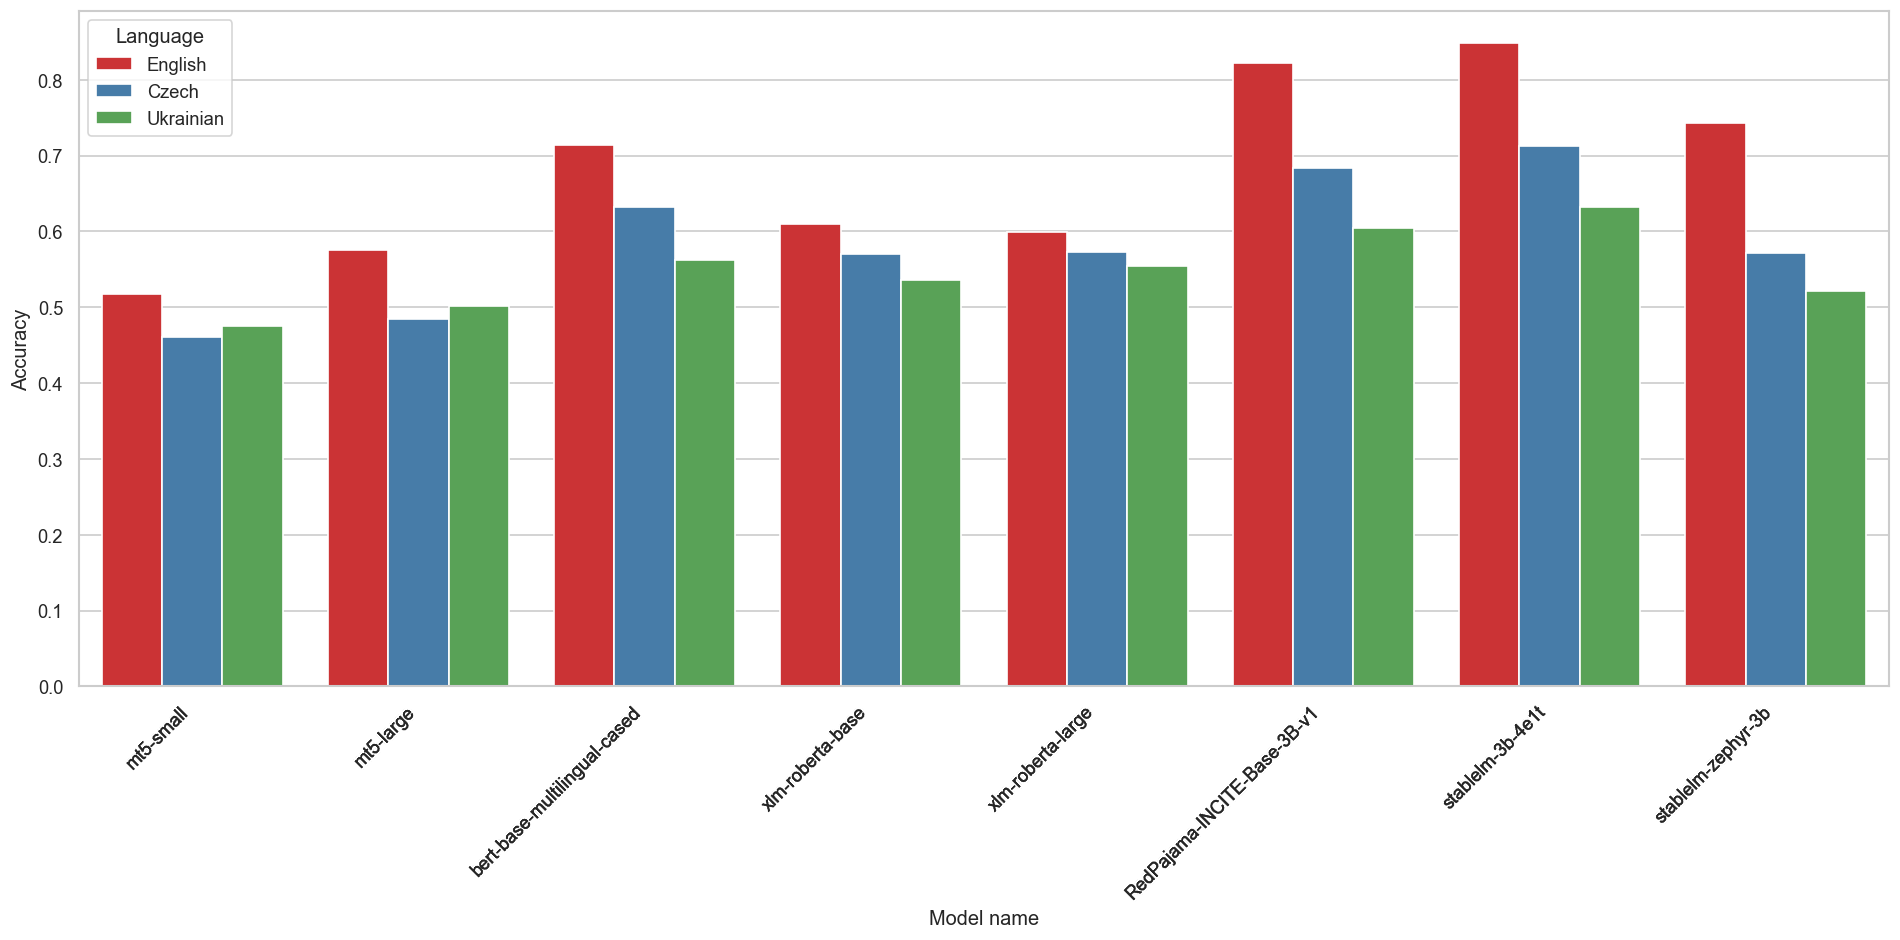

In [13]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)

bar_plot = sns.barplot(
    data=acc_df_melted, 
    x='Index', 
    y='Accuracy', 
    hue='Language', 
    palette="Set1",
)

plt.xticks(acc_df_melted['Index'], labels=acc_df_melted['Model name'], rotation=45, ha="right")
plt.ylabel('Accuracy')
plt.xlabel('Model name')

plt.tight_layout()
plt.savefig('accuracy_language.png')
plt.show()

## Efficienty

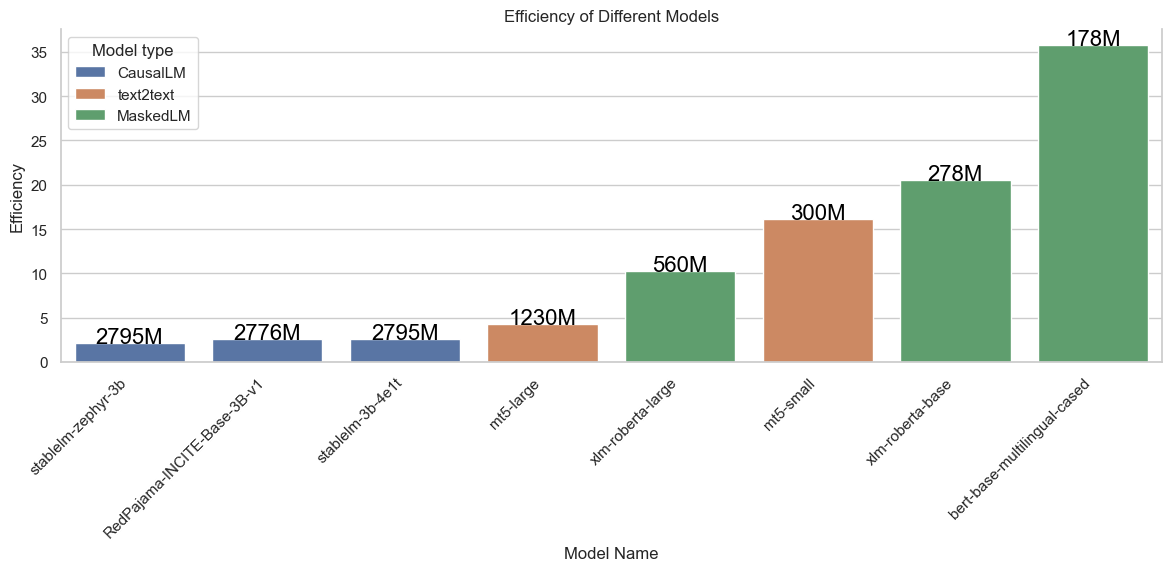

In [16]:
plt.figure(figsize=(12, 6))

acc_df_sorted_eff = acc_df.sort_values(by=['Efficienty']).reset_index(drop=True)

ax = sns.barplot(
    x='Model name', 
    y='Efficienty', 
    data=acc_df_sorted_eff,
    hue = 'Model type'
)
ax.set_title('Efficiency of Different Models')
ax.set_xlabel('Model Name')
ax.set_ylabel('Efficiency')
plt.xticks(rotation=45, ha="right")
ax.spines['top'].set_visible(False)

# Adding parameter count as annotations
for i, row in acc_df_sorted_eff.iterrows():
    ax.text(
        i, 
        row['Efficienty'], 
        f'{row["Param count (mil)"]}M', 
        color='black', 
        ha="center"
    )

plt.tight_layout()
plt.savefig('efficienty.png')
plt.show()

## Full Confidence statistics

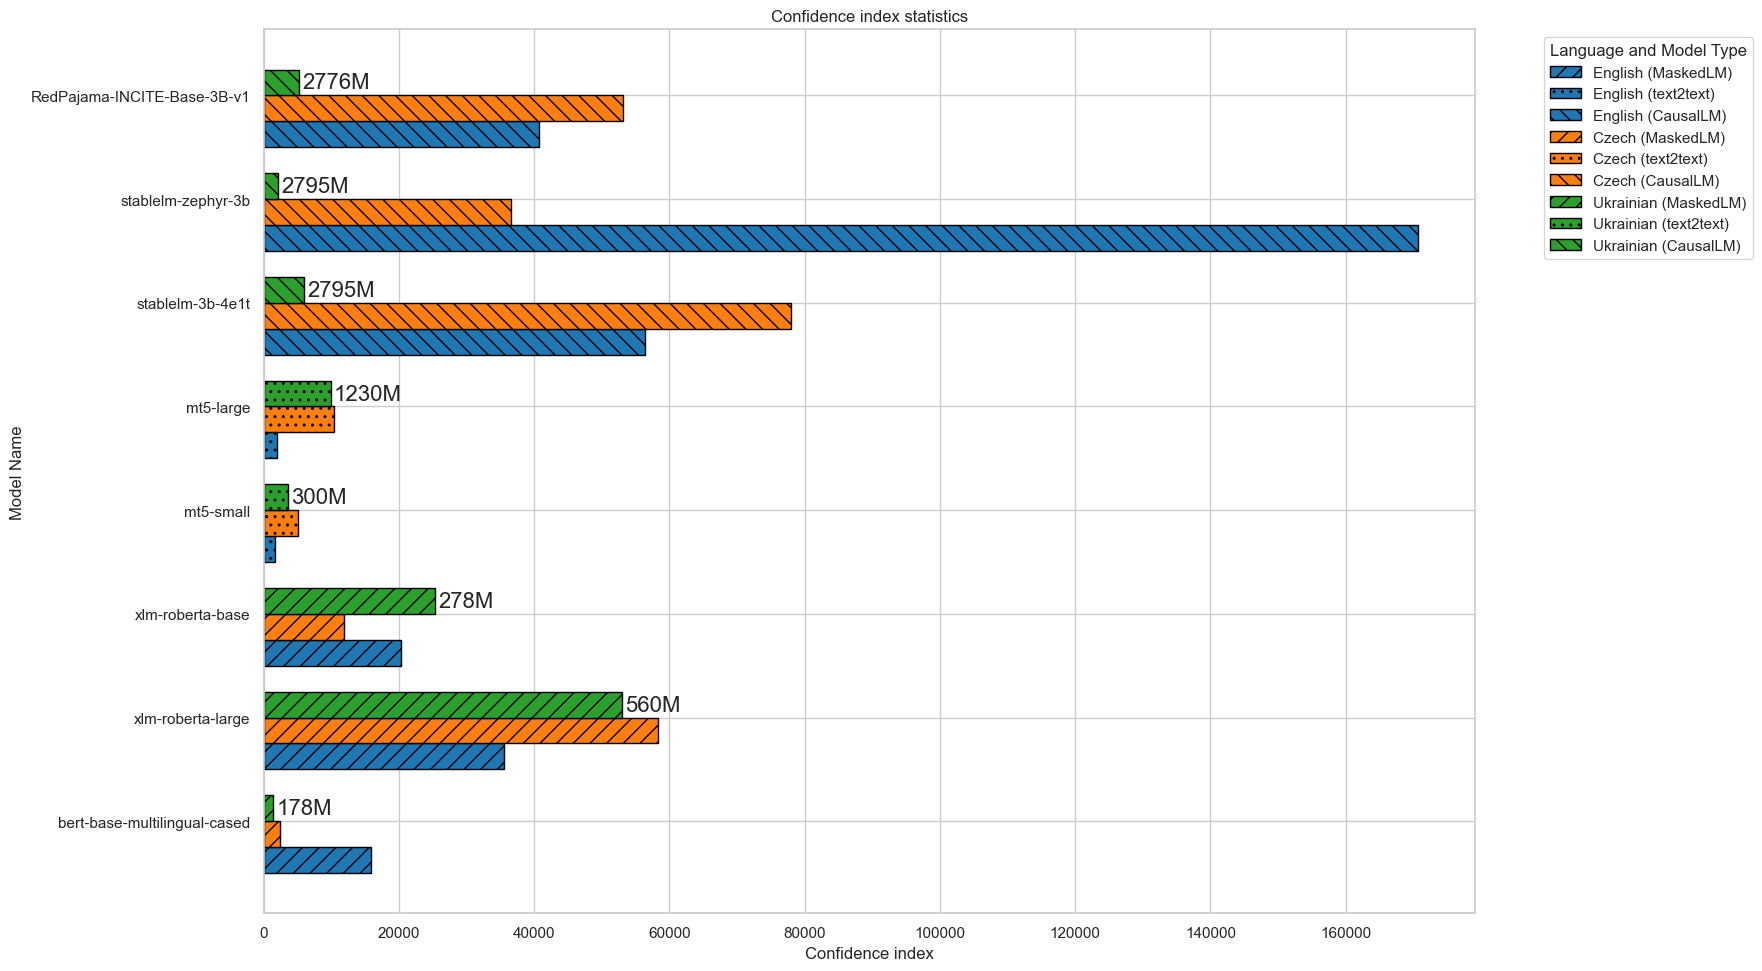

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the data to create a long format suitable for seaborn plotting
conf_df_sorted = conf_df.melt(
    id_vars=['Model name', 'Model type', 'Params count (mil)'], 
    value_vars=['English', 'Czech', 'Ukrainian'], 
    var_name='Language', value_name='Score'
)

# Define hatch patterns for each model type found in the dataset
unique_model_types = conf_df_sorted['Model type'].unique()
hatch_patterns = {model_type: patterns for model_type, patterns in zip(unique_model_types, ['//', '..', '\\\\', '++'])}

# Define a color palette for the languages
palette = sns.color_palette("tab10", n_colors=conf_df_sorted['Language'].unique().size)

# Create a new figure for the plot
plt.figure(figsize=(18, 10))

# Calculate position offsets for side-by-side bars
unique_models = conf_df_sorted['Model name'].unique()
position_offsets = dict(zip(conf_df_sorted['Language'].unique(), [-0.25, 0, 0.25]))

# Adjusting positions for each language bar
conf_df_sorted['pos'] = conf_df_sorted.apply(lambda x: unique_models.tolist().index(x['Model name']) + position_offsets[x['Language']], axis=1)

# Plotting each bar with side-by-side positioning and hatch patterns
for i, (idx, row) in enumerate(conf_df_sorted.iterrows()):
    hatch = hatch_patterns[row['Model type']]
    plt.barh(
        y=row['pos'], 
        width=row['Score'], 
        height = 0.25,
        label=f"{row['Language']} ({row['Model type']})",
        color=palette[list(conf_df_sorted['Language'].unique()).index(row['Language'])],
        hatch=hatch, edgecolor='black'
    )

# Annotate parameter counts for one language
lang_data = conf_df_sorted[conf_df_sorted['Language'] == 'Ukrainian']
for index, row in lang_data.iterrows():
    xpos = row['Score']
    ypos = unique_models.tolist().index(row['Model name']) + position_offsets['Ukrainian']
    plt.text(xpos + 500, ypos, f'{row["Params count (mil)"]}M', ha='left', va='center')

# Set the y-ticks to the middle of each group for clarity
plt.yticks([unique_models.tolist().index(name) + 0.125 for name in unique_models], unique_models)


plt.title('Confidence index statistics')
plt.xlabel('Confidence index')
plt.ylabel('Model Name')

# Simplify the legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels, unique_handles = [], []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
plt.legend(unique_handles, unique_labels, title='Language and Model Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('confidence_index_stats.png')
plt.show()

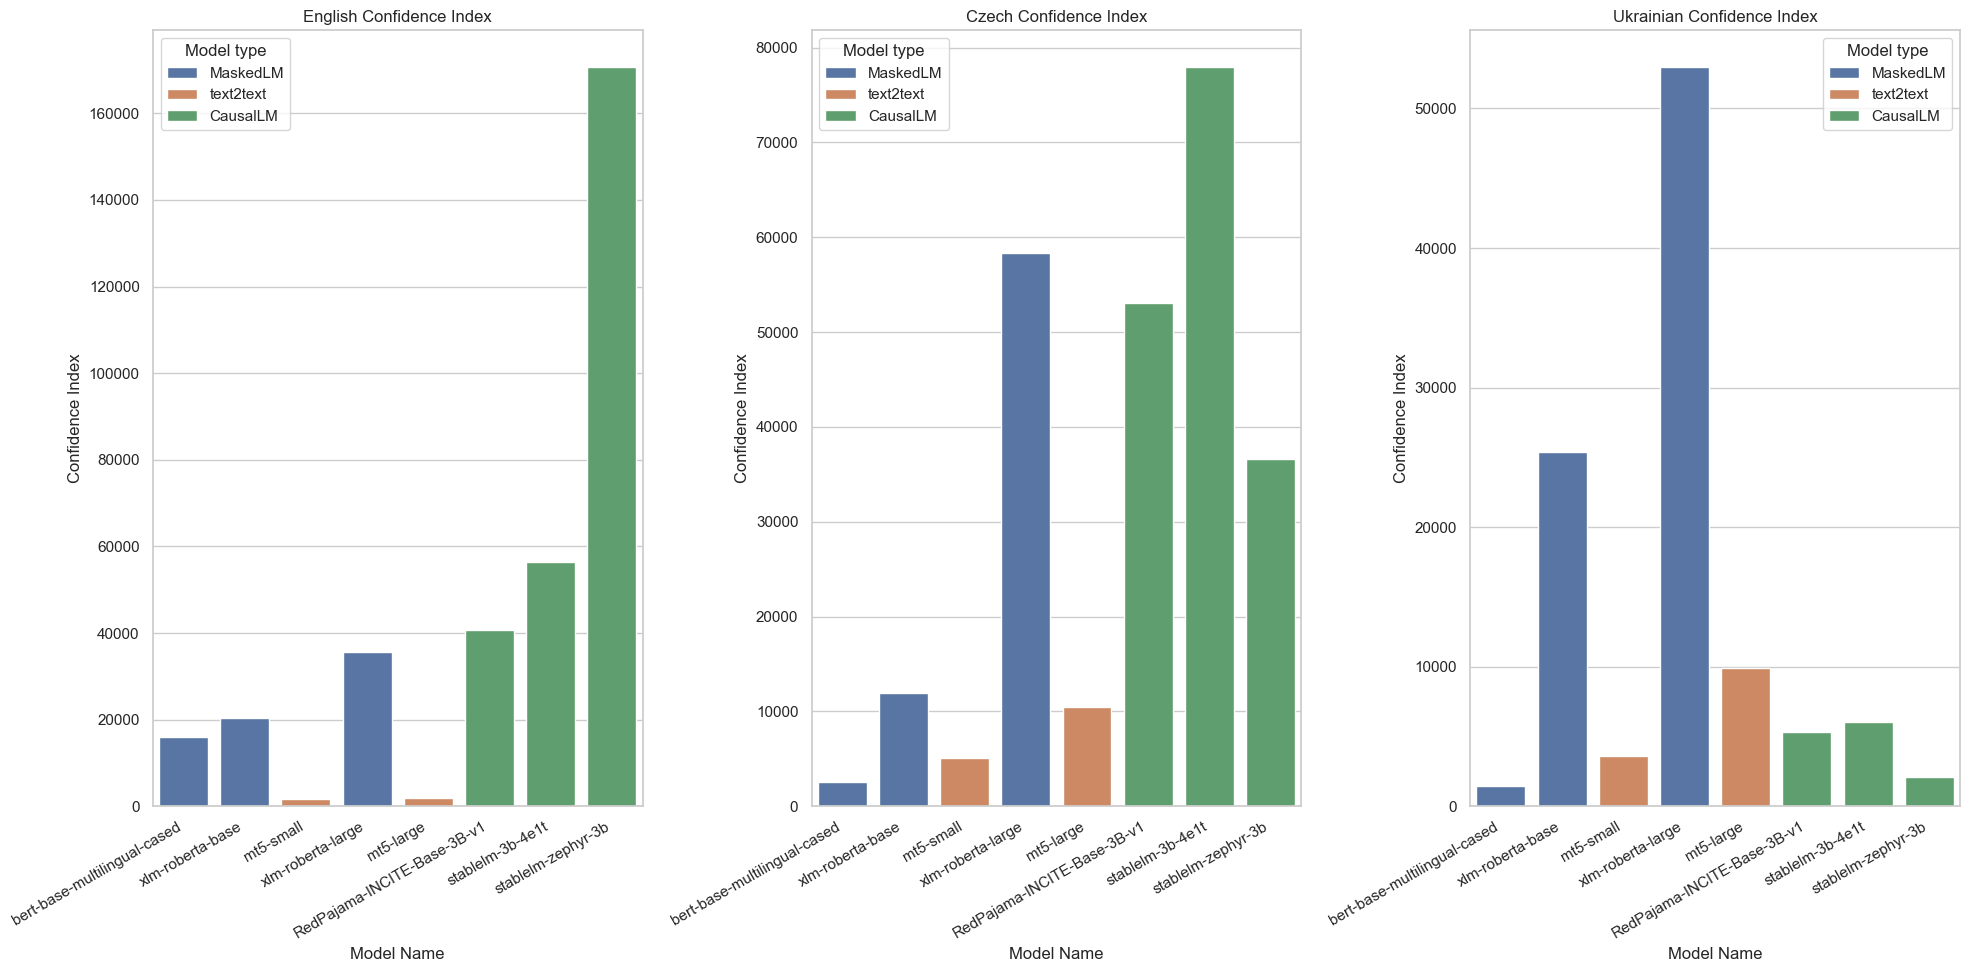

In [18]:
conf_df_sorted = conf_df.sort_values(by='Params count (mil)')

plt.figure(figsize=(20, 10))

# Create subplots for each language
languages = ['English', 'Czech', 'Ukrainian']
for i, language in enumerate(languages):
    plt.subplot(1, 3, i+1)
    sns.barplot(
        data=conf_df_sorted,
        x='Model name',
        y=language,
        hue='Model type',
        dodge=False
    )
    plt.title(f'{language} Confidence Index')
    plt.xlabel('Model Name')
    plt.ylabel('Confidence Index')
    plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.savefig('confidence_langs.png')
plt.show()

## Corrgram

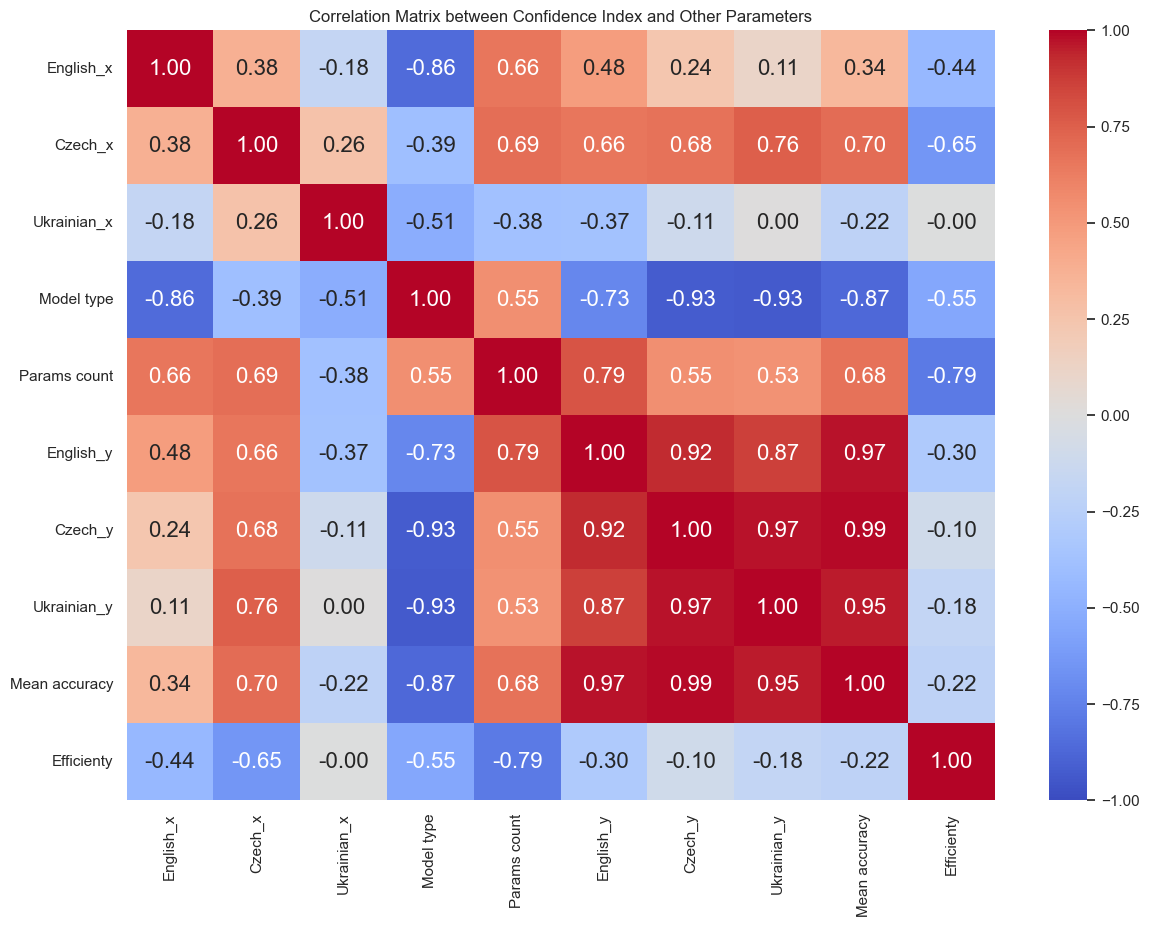

In [20]:
# Merge the two dataframes on 'Model name'
merged_df = pd.merge(conf_df, acc_df, on='Model name')
merged_df = merged_df.drop(columns=['Param count (mil)', 'Model type_y'])
merged_df = merged_df.rename(columns={'Params count (mil)': 'Params count', 'Model type_x': 'Model type'})
model_type_mapping = {'СausalLM': 1, 'MaskedLM': 2, 'text2text': 3}
merged_df['Model type'] = merged_df['Model type'].map(model_type_mapping)

# Select only numeric columns for correlation analysis
numeric_columns = merged_df.select_dtypes(include=['number']).columns
numeric_df = merged_df[numeric_columns]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix between Confidence Index and Other Parameters')
plt.savefig('corrgram.png')
plt.show()

## Fact position statistics

In [21]:
pos_df_name = 'fact_position_stats.csv'

In [22]:
pos_df = pd.read_csv(pos_df_name)

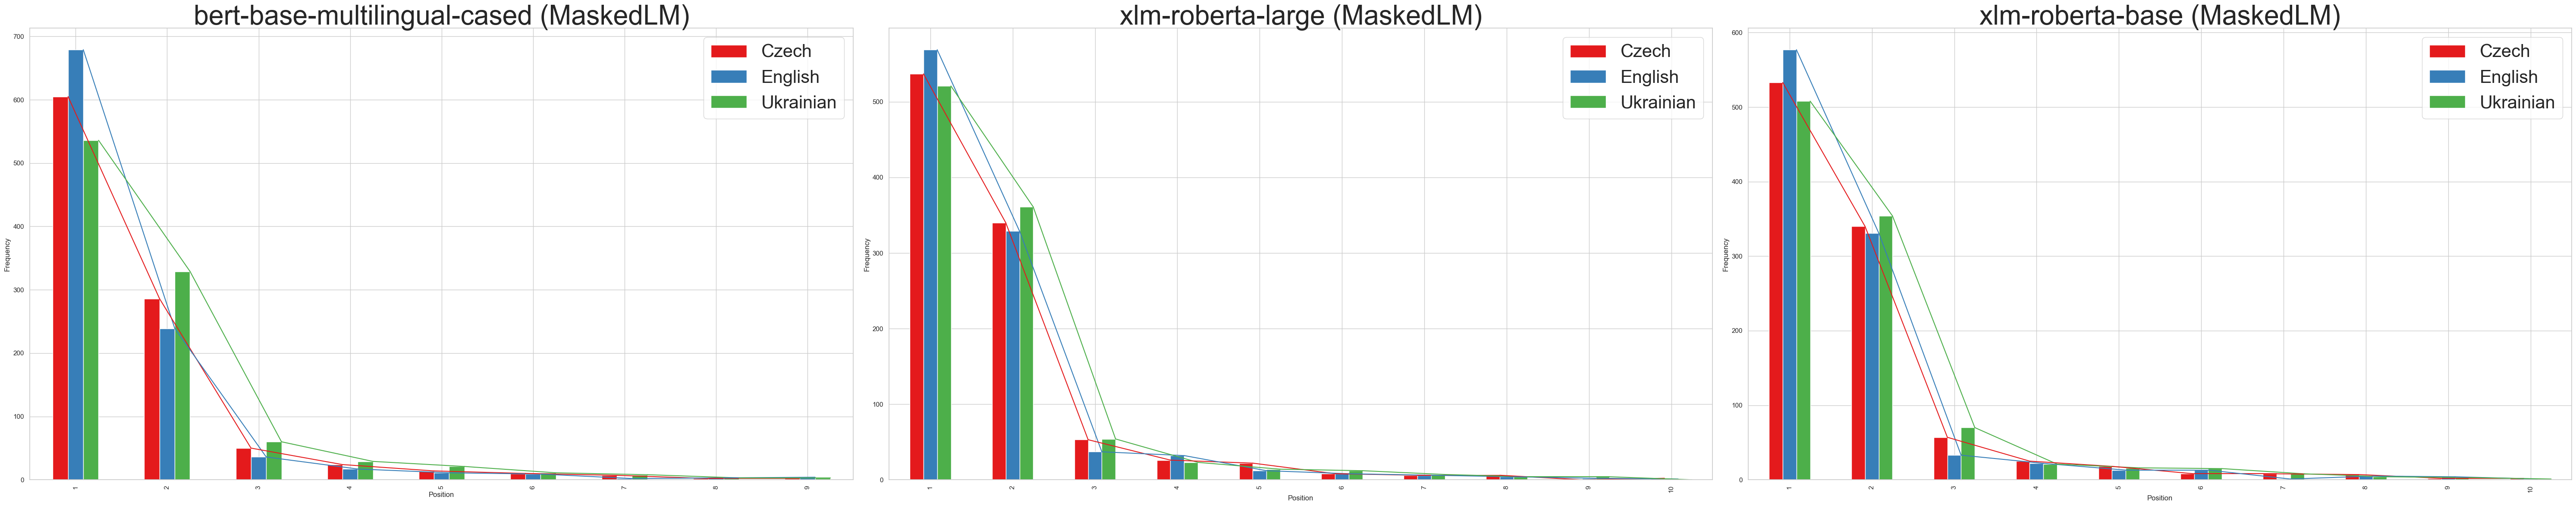

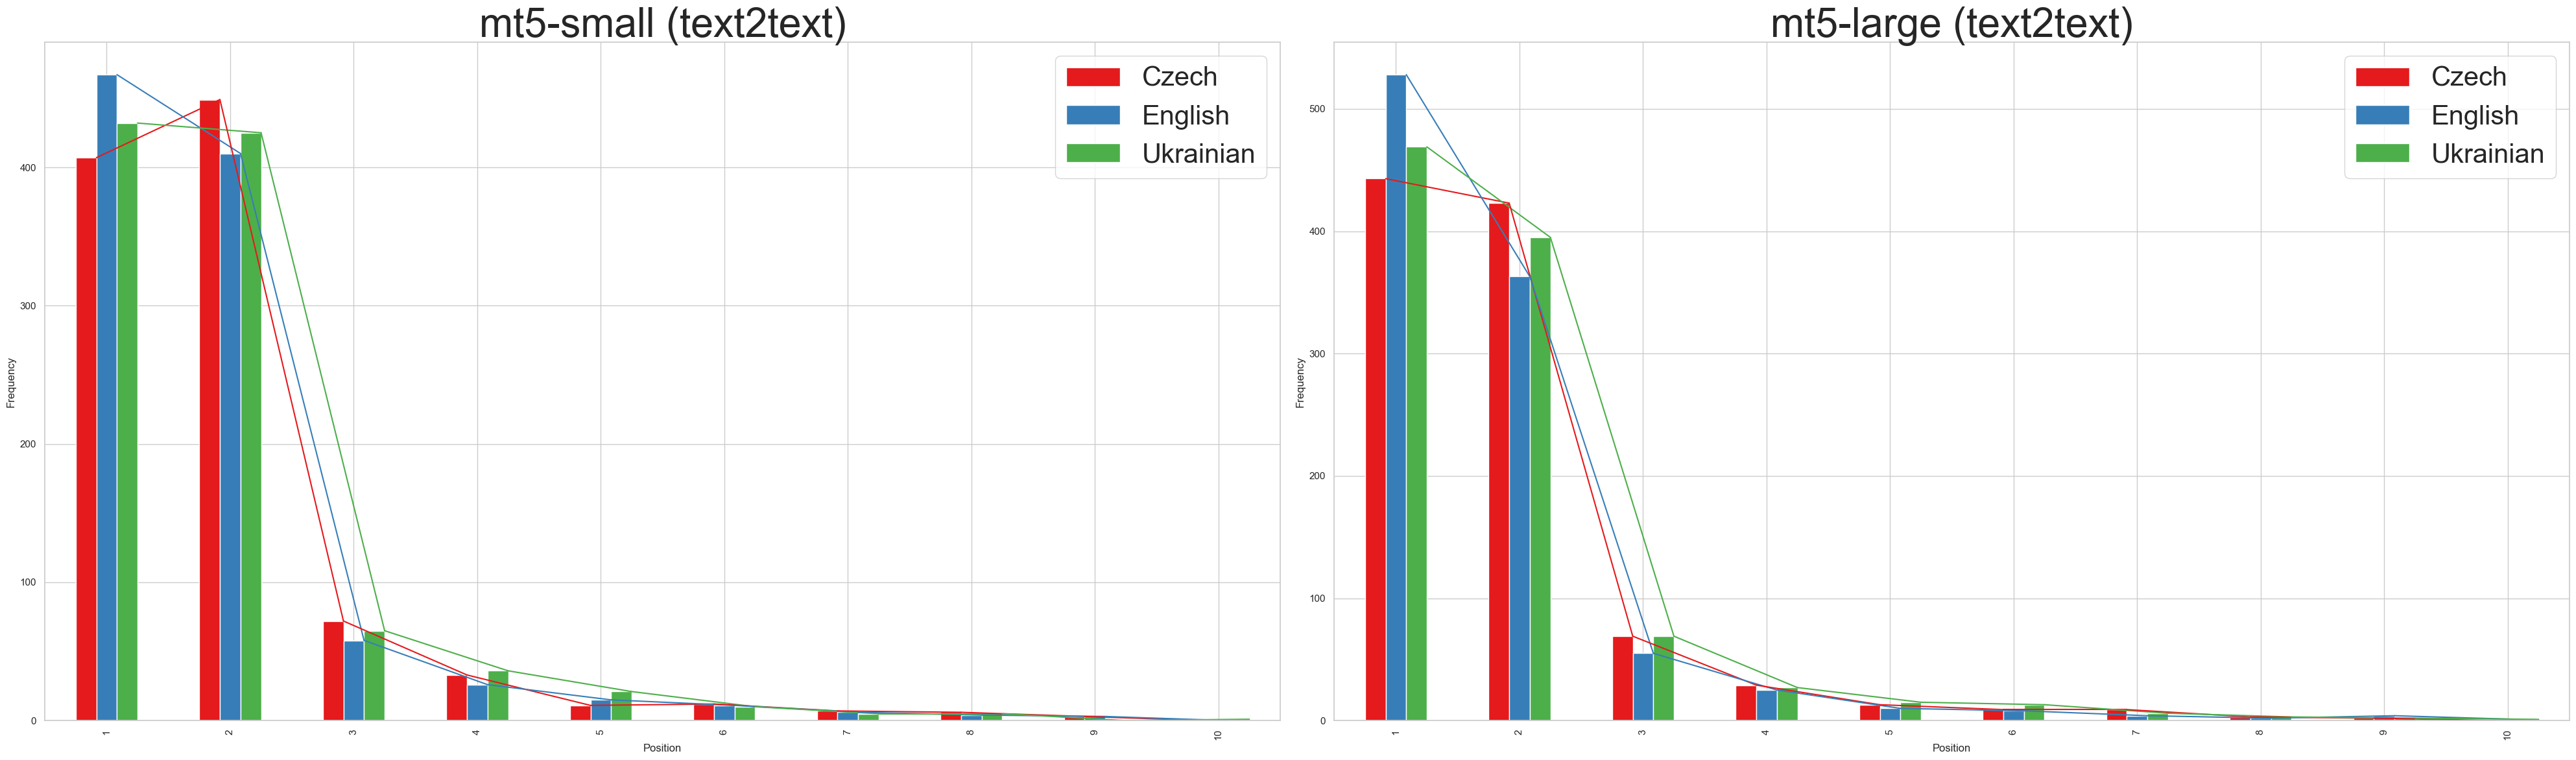

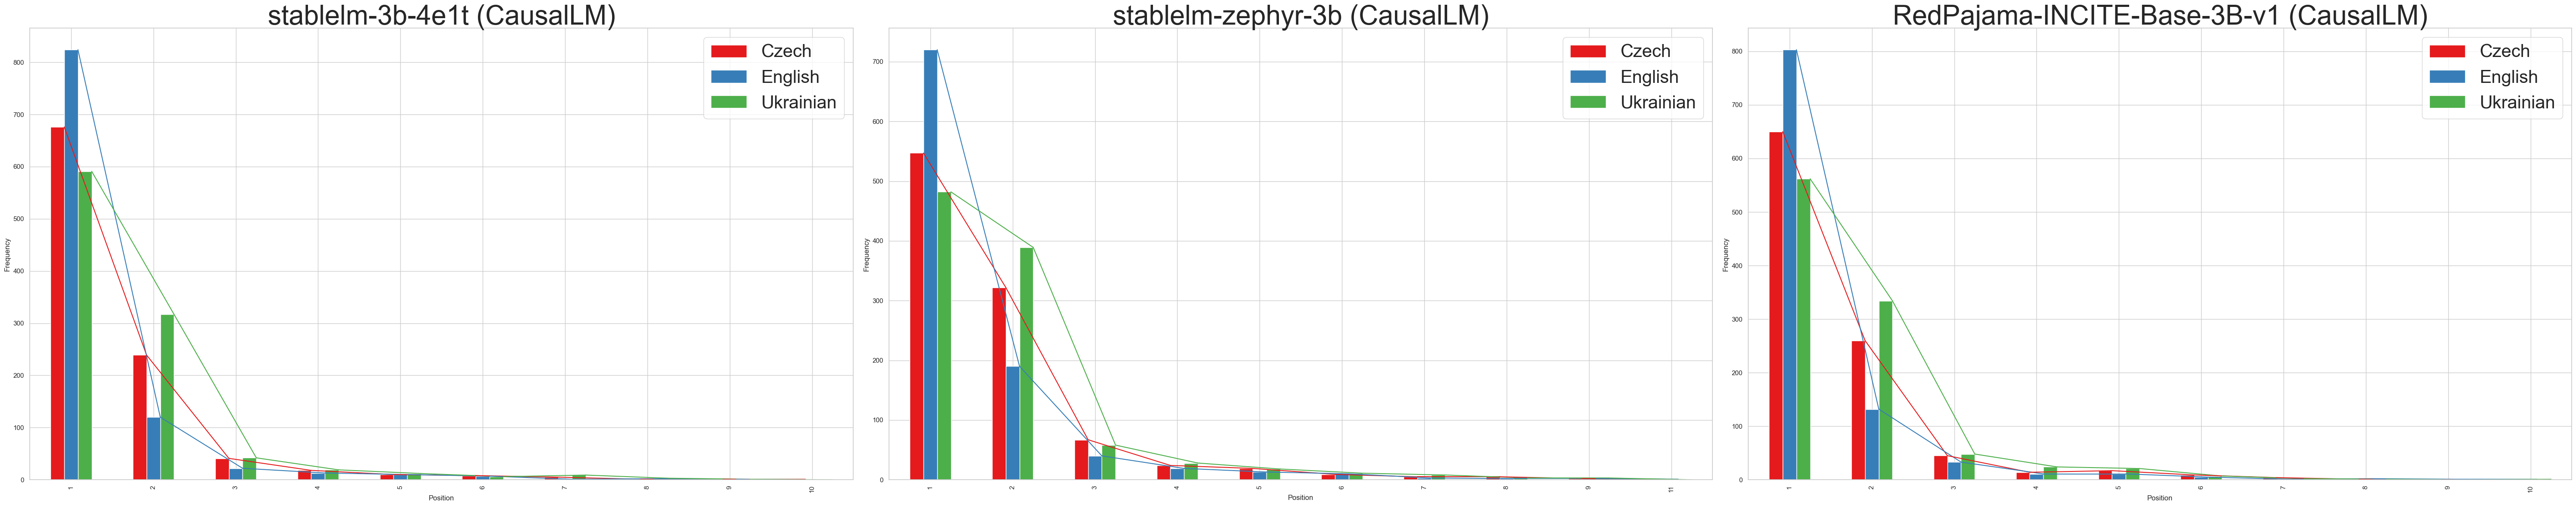

In [24]:
# Matching model names with model types from the accuracy_table file
model_type_mapping = acc_df.set_index('Model name')['Model type'].to_dict()


model_types_figures = {
    'MaskedLM': 3, 
    'text2text': 2, 
    'CausalLM': 3 
}

for model_type, num_plots in model_types_figures.items():
    fig, axes = plt.subplots(1, num_plots, figsize=(20 * num_plots, 12)) 
    if num_plots == 1:
        axes = [axes] 
    
    models_of_type = [model for model, type_name in model_type_mapping.items() if type_name == model_type]

    for ax, model in zip(axes, models_of_type):
        df = pos_df[['Language', model]]
        pivot_df = df.pivot_table(index=model, columns='Language', aggfunc='size', fill_value=0)
        
        
        bars = pivot_df.plot(kind='bar', ax=ax, edgecolor=None, color=sns.color_palette("Set1") + sns.color_palette("bright"))
        
        # Draw lines between column vertices
        for i in range(len(pivot_df) - 1):
            for j, lang in enumerate(pivot_df.columns):
                current_bar = bars.containers[j][i]
                if i + 1 < len(bars.containers[j]):
                    next_bar = bars.containers[j][i + 1]
                    
                    current_x = current_bar.get_x() + current_bar.get_width()
                    current_y = current_bar.get_height()
                    
                    next_x = next_bar.get_x() + next_bar.get_width()
                    next_y = next_bar.get_height()
                    
                    # Drawing a line
                    ax.plot([current_x, next_x], [current_y, next_y], color=current_bar.get_facecolor())
        
        ax.set_title(f"{model} ({model_type})", fontsize = 45)
        ax.set_xlabel('Position')
        ax.set_ylabel('Frequency')
        ax.legend(fontsize = 30)
        
    plt.tight_layout()
    plt.savefig(f'position_stats_{model_type}.png')
    plt.show()